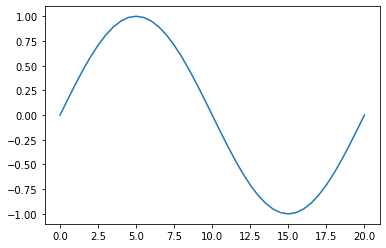

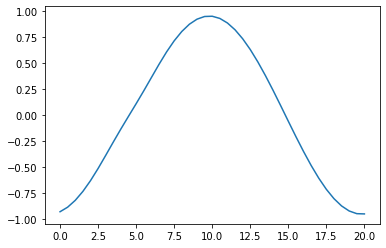

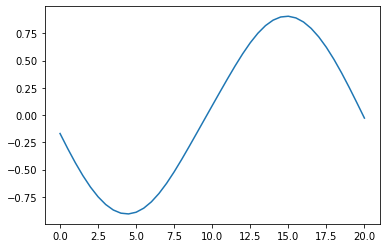

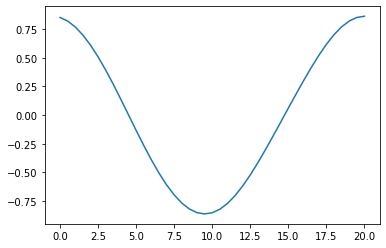

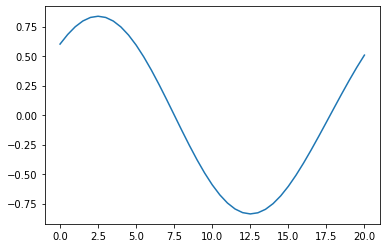

А теперь Лакс Вендрофф


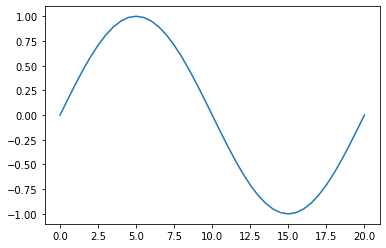

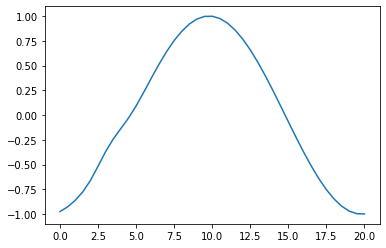

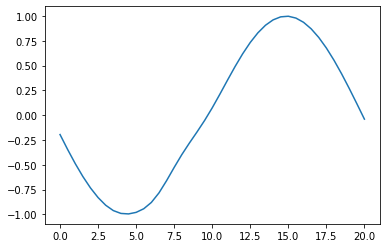

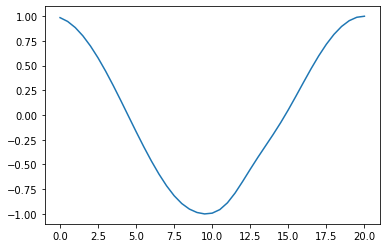

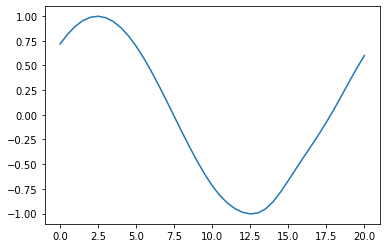

In [ ]:
import matplotlib.pyplot as p
import math as mt
import numpy as np

CFL = 0.6;
h = 0.5;
L = 20;
T = 18;
Nx = int(L/h) + 1;
tao = CFL * h;
Nt = int(T/tao) + 1;

x = [(i)*h for i in range(Nx)];
t = [(i)*tao for i in range(Nt)];
u = [[0 for i in range(Nx)] for j in range(Nt)];
u2 = [[0 for i in range(Nx)] for j in range(Nt)];

#Начальные условия
for m in range(Nx):
    u[0][m] = mt.sin(2*mt.pi*m*h/L);
    u2[0][m] = mt.sin(2*mt.pi*m*h/L);

#Граничные условия - периодические
    
#Уголочек
for n in range(Nt-1):
    u[n+1][0] = tao/h*(u[n][Nx-1] - u[n][0]) + u[n][0];
    for m in range(Nx-1):
        u[n+1][m+1] = tao/h*(u[n][m] - u[n][m+1]) + u[n][m+1];

#Лакс-Вендрофф
a = 1;
for n in range(Nt-1):
    u2[n+1][0] = a*tao/2/h*(u2[n][Nx-1] - u2[n][1]) + a*a*tao*tao/2/h/h*(u2[n][1] -2*u2[n][0] + u2[n][Nx-1]) + u2[n][0];
    u2[n+1][Nx-1] = a*tao/2/h*(u2[n][Nx-2] - u2[n][0]) + a*a*tao*tao/2/h/h*(u2[n][0] -2*u2[n][Nx-1] + u2[n][Nx-2]) + u2[n][Nx-1];
    for m in range(Nx-2):
        u2[n+1][m+1] = a*tao/2/h*(u2[n][m] - u2[n][m+2]) + tao*tao*a*a/2/h/h*(u2[n][m+2] -2*u2[n][m+1] + u2[n][m]) + u2[n][m+1];
            


###################################
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
#plt.style.use('dark_background')
 
fig = plt.figure();
ax1 = fig.add_subplot(1, 1, 1);

def animate(i):
    xs = x;
    ys = u[i];
 
    p.plot(x, u[i], color = 'b');
    ax1.clear()
    ax1.plot(xs, ys, color = 'b')
    ax1.axis([0, 20, -1, 1])
 
    plt.xlabel('X')
    plt.ylabel('U')
    plt.title('Уравнение переноса - уголок');


def animate2(i):
    xs = x;
    ys = u2[i];
 
    p.plot(x, u2[i], color = 'k');
    ax1.clear()
    ax1.plot(xs, ys, color = 'k')
    ax1.axis([0, 20, -1, 1])
 
    plt.xlabel('X')
    plt.ylabel('U')
    plt.title('Уравнение переноса - Лакс-Вендрофф');
    
    
t1 = 0;
t2 = int((Nt-1)/18*5);
t3 = int((Nt-1)/18*10);
t4 = int((Nt-1)/18*15);
t5 = Nt-1;
    
plt.plot(x,u[t1]);
plt.show();
plt.plot(x,u[t2]);
plt.show();
plt.plot(x,u[t3]);
plt.show();
plt.plot(x,u[t4]);
plt.show();
plt.plot(x,u[t5]);
plt.show();
print('А теперь Лакс Вендрофф');
plt.plot(x,u2[t1]);
plt.show();
plt.plot(x,u2[t2]);
plt.show();
plt.plot(x,u2[t3]);
plt.show();
plt.plot(x,u2[t4]);
plt.show();
plt.plot(x,u2[t5]);
plt.show();

#
#tt = len(t);
#
#ani = animation.FuncAnimation(fig, animate, interval=50, frames = tt);
#plt.show();
#ani2 = animation.FuncAnimation(fig, animate2, interval=50, frames = tt);
#plt.show();
#ani.save('1-ugolok.gif', writer='imagemagick');
#ani2.save('1-LV.gif', writer='imagemagick');
